In [1]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install transformers[torch]
!pip install datasets
!pip install transformers datasets evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 6.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

# 데이터 불러오기

In [3]:
DF = pd.read_csv('/content/drive/MyDrive/Final.csv')
DF['product'] = DF['product'].replace('Money transfer, virtual currency, or money service', 'Money transfer')
DF= DF[['consumer complaint narrative','product','issue']]
DF

,consumer complaint narrative,product,issue
0,I made a purchase with XXXX to purchase a prod...,Credit card,Problem with a purchase shown on your statement
1,i asked the JC Penny store employee if there w...,Credit card,Getting a credit card
2,"Synchrony Bank, who owns the stores credit car...",Credit card,Closing your account
3,This bank doesnt value me as a customer or my ...,Credit card,"Other features, terms, or problems"
4,Purchase from XXXX on XX/XX/XXXX XXXX XXXX on ...,Credit card,Problem with a purchase shown on your statement
...,...,...,...
1326536,XX/XX/2022 Truist checking account fraudulentl...,Checking or savings account,Opening an account
1326537,We had 3 savings/investment account that were ...,Checking or savings account,Managing an account
1326538,Please refer all my complaints about Keybank. ...,Checking or savings account,Closing an account
1326539,There is a company name XXXX which provides t...,Checking or savings account,Problem with a lender or other company chargin...


In [4]:
DF_Mortgage = DF[DF['product'] == 'Mortgage']
DF_Mortgage

,consumer complaint narrative,product,issue
1160967,I have submitted multiple requests to be conta...,Mortgage,Struggling to pay mortgage
1160968,I sent to two of their emails two full and com...,Mortgage,Struggling to pay mortgage
1160969,This is in reference to complaint # XXXX. Wher...,Mortgage,Trouble during payment process
1160970,Since XX/XX/XXXXXXXX I have paid extra every ...,Mortgage,Trouble during payment process
1160971,I received an email with the disclosure copied...,Mortgage,Trouble during payment process
...,...,...,...
1227651,"On XX/XX/2023, I applied with XXXX Tap company...",Mortgage,Applying for a mortgage or refinancing an exis...
1227652,This is a follow-up complaint to the previousl...,Mortgage,Trouble during payment process
1227653,Wells Fargo was contacted via the title compan...,Mortgage,Closing on a mortgage
1227654,On XX/XX/23 Roundpoint Mortgage Servicing LLC ...,Mortgage,Trouble during payment process


In [ ]:
DF_Mortgage['issue'].value_counts()

issue
Trouble during payment process                                 33819
Struggling to pay mortgage                                     15835
Applying for a mortgage or refinancing an existing mortgage    10054
Closing on a mortgage                                           6981
Name: count, dtype: int64

# 자연어처리

In [5]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
data = list(DF_Mortgage['consumer complaint narrative'])
clean = []
for narrative in (data):
 clean_narrative = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》XXXX{}]', '', narrative)
 clean.append(clean_narrative)
DF_Mortgage['narrative'] = clean

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [6]:
lower = [text.lower() for text in DF_Mortgage['narrative'].values]
DF_Mortgage['narrative'] = lower

In [7]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

DF_Mortgage["narrative"]=DF_Mortgage["narrative"].apply(lambda x: remove_stopwords(x))

DF_Mortgage.head()

,consumer complaint narrative,product,issue,narrative
1160967,I have submitted multiple requests to be conta...,Mortgage,Struggling to pay mortgage,submitted multiple requests contacted manageme...
1160968,I sent to two of their emails two full and com...,Mortgage,Struggling to pay mortgage,sent two emails two full complete applications...
1160969,This is in reference to complaint # XXXX. Wher...,Mortgage,Trouble during payment process,reference complaint sps states mortgage paymen...
1160970,Since XX/XX/XXXXXXXX I have paid extra every ...,Mortgage,Trouble during payment process,since paid extra every month applied escrow fi...
1160971,I received an email with the disclosure copied...,Mortgage,Trouble during payment process,received email disclosure copied mortgage serv...


# 데이터 추출 및 컬럼명 변경

In [8]:
DF_test = DF_Mortgage[['narrative','issue']]
DF_test.columns = ['text', 'label']
DF_test

,text,label
1160967,submitted multiple requests contacted manageme...,Struggling to pay mortgage
1160968,sent two emails two full complete applications...,Struggling to pay mortgage
1160969,reference complaint sps states mortgage paymen...,Trouble during payment process
1160970,since paid extra every month applied escrow fi...,Trouble during payment process
1160971,received email disclosure copied mortgage serv...,Trouble during payment process
...,...,...
1227651,2023 applied tap company loan equity home proc...,Applying for a mortgage or refinancing an exis...
1227652,followup complaint previously filed cfpb compl...,Trouble during payment process
1227653,wells fargo contacted via title company late i...,Closing on a mortgage
1227654,23 roundpoint mortgage servicing llc issued re...,Trouble during payment process


# 데이터 분할

In [9]:
x = DF_test
Y = DF_test['label']
x_train, x_test, y_train, y_test = train_test_split(x, Y,test_size = 0.1, stratify = Y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60020, 2) (60020,) (6669, 2) (6669,)


In [ ]:
x_train.head()

,text,label
1170364,last 12 months since mortgage payments match l...,Trouble during payment process
1214817,va federally backed mortgage loan according co...,Struggling to pay mortgage
1186075,closed refinance mortgage set first payment du...,Trouble during payment process
1175201,consumer financial protection bureau complaint...,Trouble during payment process
1218850,greetings deed ohio lender placed insurance on...,Trouble during payment process


In [ ]:
x_test

,text,label
1179613,began process refinance existing mortgage vari...,Applying for a mortgage or refinancing an exis...
1205426,loan transferred chase called request payoff q...,Closing on a mortgage
1173487,complaint regarding cybersecurity incident fin...,Trouble during payment process
1169571,issue regard phh mortgage services releasing f...,Trouble during payment process
1169621,trying refinance mortgage loancare lower rate ...,Closing on a mortgage
...,...,...
1219632,pnc bank advised us would refinance loan 33 th...,Applying for a mortgage or refinancing an exis...
1187630,denied home equity line credit iberia bank fal...,Applying for a mortgage or refinancing an exis...
1199510,made mortgage payoff crosscountry mortgage llc...,Trouble during payment process
1219914,loan servicing website broken allow users log ...,Trouble during payment process


# 데이터셋 만들기




In [10]:
import transformers
transformers.logging.set_verbosity_error()
import warnings; warnings.filterwarnings('ignore')
import os; os.environ['WANDB_DISABLED'] = 'true'
from datasets import Dataset,Features,Value,ClassLabel, DatasetDict

traindts = Dataset.from_pandas(x_train)
traindts = traindts.class_encode_column("label")
testdts = Dataset.from_pandas(x_test)
testdts = testdts.class_encode_column("label")

Casting to class labels:   0%|          | 0/60020 [00:00<?, ? examples/s]

Casting to class labels:   0%|          | 0/6669 [00:00<?, ? examples/s]

In [11]:
corpus = DatasetDict({"train" : traindts ,
                      "validation" : testdts })
corpus

DatasetDict({
    train: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 60020
    })
    validation: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 6669
    })
})

# 토큰화

In [12]:
from transformers import RobertaConfig, RobertaModel, RobertaTokenizer

In [13]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [14]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

In [15]:
tokenized_corpus = corpus.map(preprocess_function, batched=True)

Map:   0%|          | 0/60020 [00:00<?, ? examples/s]

Map:   0%|          | 0/6669 [00:00<?, ? examples/s]

# 패딩?

In [16]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, padding = True,max_length = 128)

# 성능평가 함수

In [17]:
import evaluate
accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

# 모델

In [18]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = (AutoModelForSequenceClassification.from_pretrained(
    "roberta-base", num_labels=4).to(device))

cuda


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [20]:
tokenized_corpus["validation"].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['Applying for a mortgage or refinancing an existing mortgage', 'Closing on a mortgage', 'Struggling to pay mortgage', 'Trouble during payment process'], id=None),
 '__index_level_0__': Value(dtype='int64', id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}

# 빠인뜌닝

In [19]:
training_args = TrainingArguments(
    output_dir="best_model_Mortgage",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_corpus["train"],
    eval_dataset=tokenized_corpus["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()
trainer.save_model()

{'loss': 0.7935, 'grad_norm': 10.251750946044922, 'learning_rate': 1.8667377398720682e-05, 'epoch': 0.13326226012793177}
{'loss': 0.655, 'grad_norm': 5.637390613555908, 'learning_rate': 1.7334754797441367e-05, 'epoch': 0.26652452025586354}
{'loss': 0.6355, 'grad_norm': 12.615825653076172, 'learning_rate': 1.6002132196162048e-05, 'epoch': 0.3997867803837953}
{'loss': 0.6199, 'grad_norm': 9.462096214294434, 'learning_rate': 1.4669509594882732e-05, 'epoch': 0.5330490405117271}
{'loss': 0.6046, 'grad_norm': 9.167570114135742, 'learning_rate': 1.3336886993603413e-05, 'epoch': 0.6663113006396588}
{'loss': 0.6105, 'grad_norm': 5.761023044586182, 'learning_rate': 1.2004264392324093e-05, 'epoch': 0.7995735607675906}
{'loss': 0.5929, 'grad_norm': 11.677459716796875, 'learning_rate': 1.0671641791044778e-05, 'epoch': 0.9328358208955224}
{'eval_loss': 0.5794702172279358, 'eval_accuracy': 0.782276203328835, 'eval_runtime': 164.0826, 'eval_samples_per_second': 40.644, 'eval_steps_per_second': 2.541, 

In [ ]:
pred_output = trainer.predict(tokenized_corpus["validation"])
pred_output

PredictionOutput(predictions=array([[ 3.1674187 ,  0.76176095, -2.5074215 , -1.697466  ],
       [-0.8849765 ,  0.71217793, -0.32752937,  0.6959774 ],
       [-1.7759783 , -2.1956344 , -0.3418269 ,  4.4186134 ],
       ...,
       [-1.1410636 ,  0.9880766 , -2.1734118 ,  2.5000925 ],
       [-1.6038629 , -2.3668113 , -0.28438073,  4.3780437 ],
       [ 2.4237099 ,  1.9350095 , -3.8002105 , -1.1080929 ]],
      dtype=float32), label_ids=array([0, 1, 3, ..., 3, 3, 0]), metrics={'test_loss': 0.5642632246017456, 'test_accuracy': 0.7894736842105263, 'test_runtime': 178.0072, 'test_samples_per_second': 37.465, 'test_steps_per_second': 2.343})

In [ ]:
print(f'Output Predition: {pred_output.predictions.shape}')
print(pred_output.predictions)

Output Predition: (6669, 4)
[[ 3.1674187   0.76176095 -2.5074215  -1.697466  ]
 [-0.8849765   0.71217793 -0.32752937  0.6959774 ]
 [-1.7759783  -2.1956344  -0.3418269   4.4186134 ]
 ...
 [-1.1410636   0.9880766  -2.1734118   2.5000925 ]
 [-1.6038629  -2.3668113  -0.28438073  4.3780437 ]
 [ 2.4237099   1.9350095  -3.8002105  -1.1080929 ]]


In [ ]:
import numpy as np

# Decode the predictions greedily using argmax (highest value of all classes)
y_preds = np.argmax(pred_output.predictions,axis=1)
print(f'Output Prediction:{y_preds.shape}')
print(f'Predictions: {y_preds}')

Output Prediction:(6669,)
Predictions: [0 1 3 ... 3 3 0]


In [ ]:
labels = tokenized_corpus["train"].features["label"].names
y_valid = np.array(tokenized_corpus["validation"]['label'])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_model, y_true, labels):
    cm = confusion_matrix(y_true,y_model,normalize='true')
    fig, ax = plt.subplots(figsize=(8,8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm.round(2).copy(), display_labels=labels)
    disp.plot(ax=ax, colorbar=False)
    plt.title("Confusion matrix")
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.tight_layout()
    plt.show()

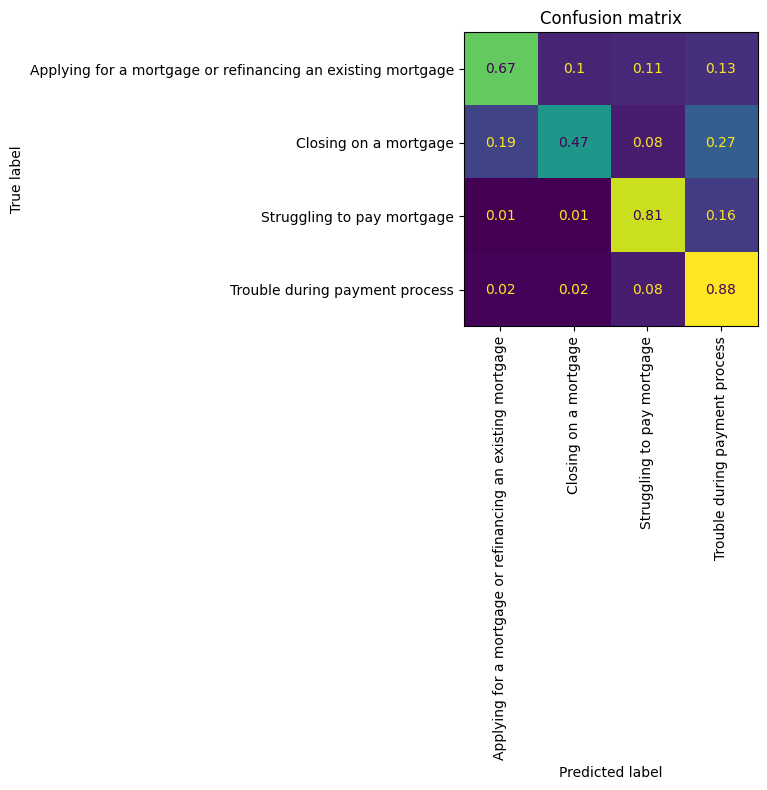

In [ ]:
plot_confusion_matrix(y_preds,y_valid,labels)